# Recognition pipeline

In [1]:
%load_ext autoreload
%autoreload 2

In [91]:
import PIL.Image
import numpy as np
import os
import matplotlib.pyplot as plt
from recognition_functions import table_extraction, partition_image

import cv2
from math import floor

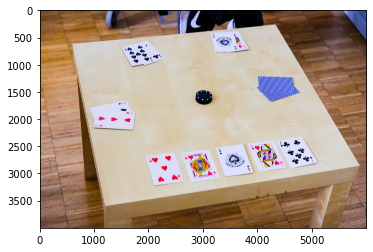

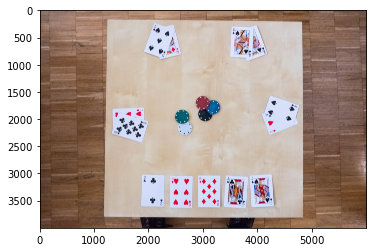

In [78]:
path_data = "data/train"
path_setup = "data/image_setup/"

file = os.path.join(path_data, f"train_{str(0).zfill(2)}.jpg")
file_xtrem = os.path.join(path_setup, "ultimate_test.jpg")

# open the image
im_xtrem = PIL.Image.open(file_xtrem)
plt.imshow(im_xtrem)
plt.show()

# open the image
im = PIL.Image.open(file)
plt.imshow(im)
plt.show()

### Extract table images

In [79]:
table_images = []

for i in range(28):
    #if i not in problematic_imgs:
    file = os.path.join(path_data, f"train_{str(i).zfill(2)}.jpg")
    im = PIL.Image.open(file)
    table_images.append(table_extraction(img = np.array(im)))

### Extract images

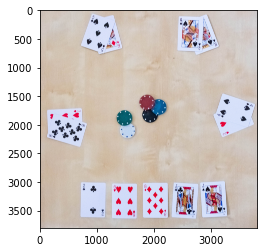

In [80]:
plt.imshow(table_images[0])
plt.show()

In [87]:
partitions = []
for img in table_images:
    partition = partition_image(img)
    partitions.append(partition)


### Segment bottom images

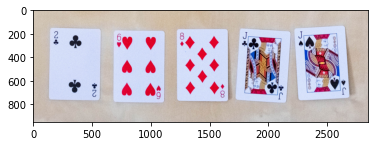

In [88]:
partition = partitions[0]

bottom_cards = partition['bottom_cards']
plt.imshow(bottom_cards)
plt.show()

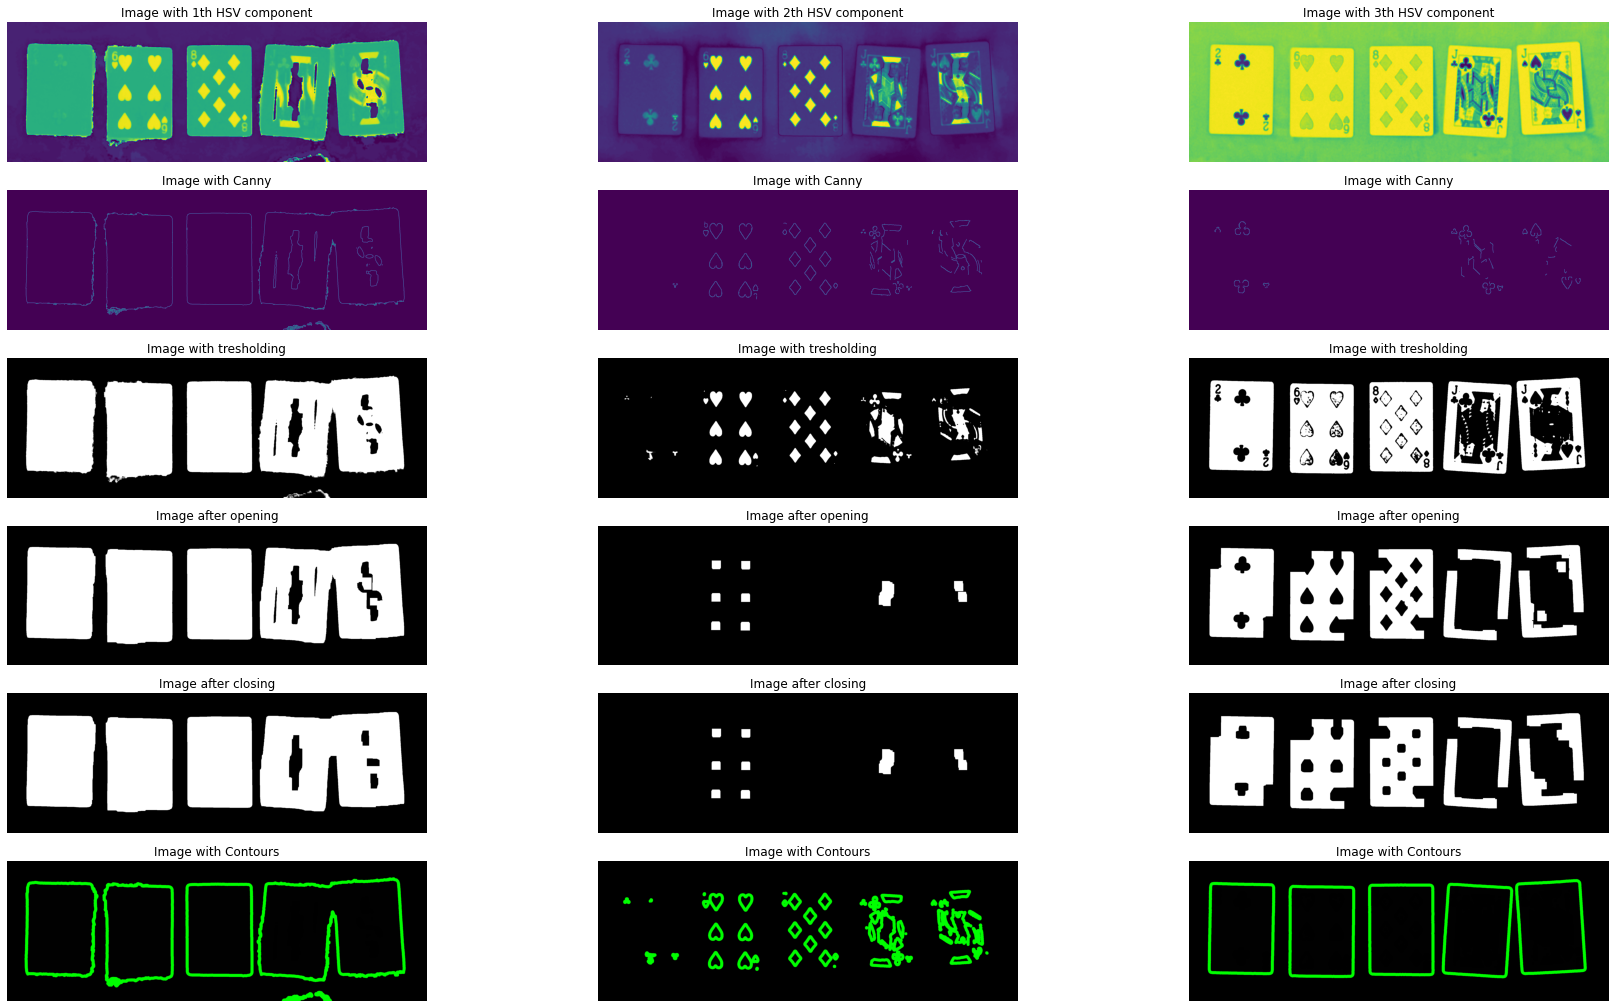

In [155]:
# img = cv2.cvtColor(bottom_cards,cv2.COLOR_BGR2GRAY)
from plot_helper import plot_HSV_Contour
img_HSV = cv2.cvtColor(bottom_cards, cv2.COLOR_RGB2HSV)
plot_HSV_Contour(bottom_cards)
flag, img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)


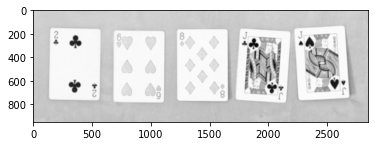

212
249


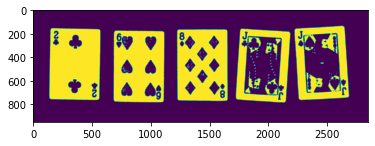

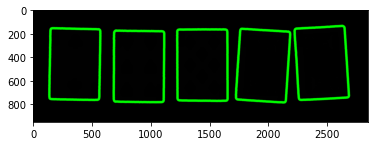

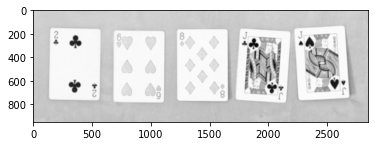

212
249


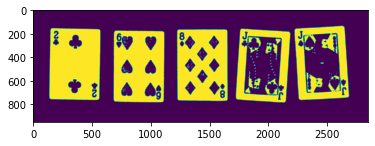

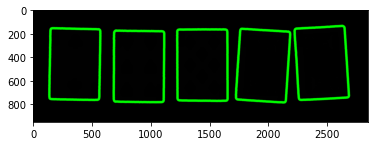

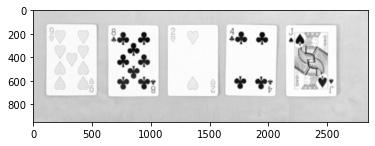

212
244


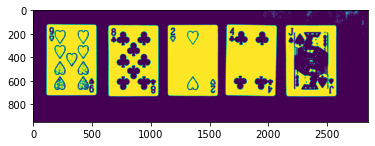

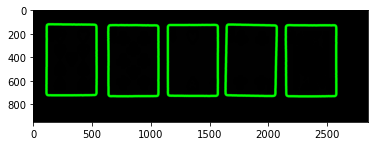

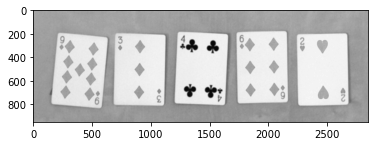

159
217


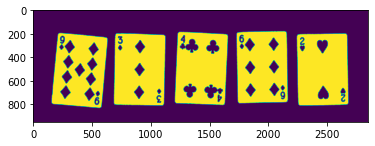

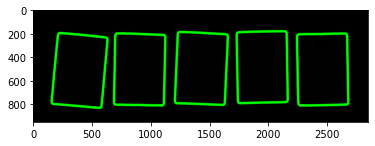

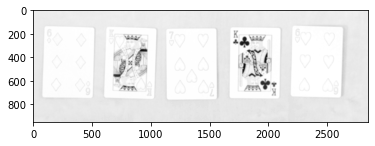

237
253


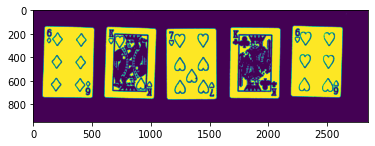

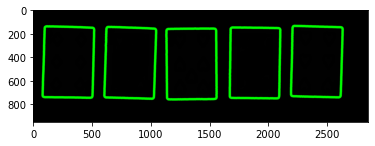

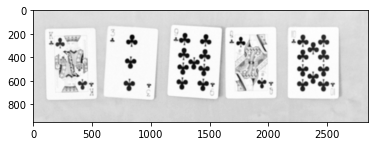

223
243


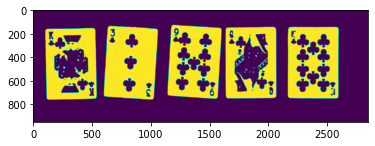

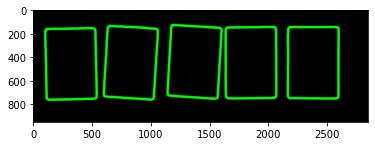

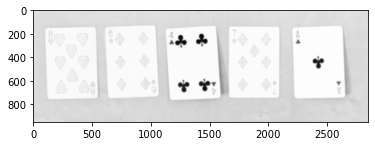

223
249


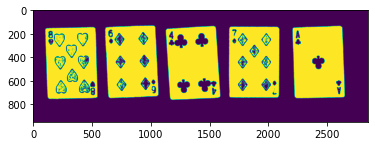

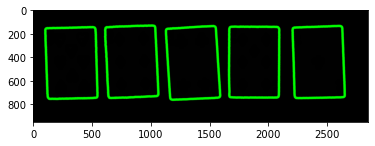

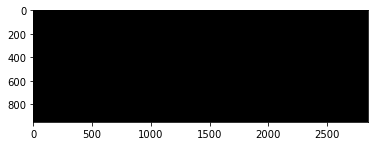

111
111


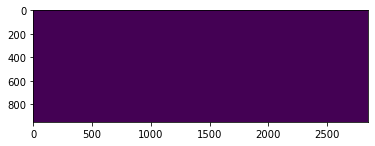

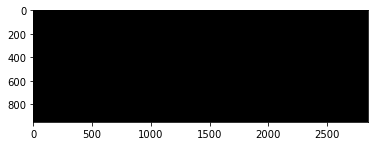

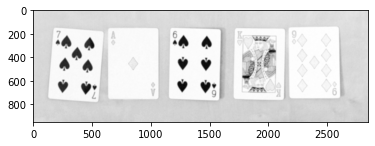

222
254


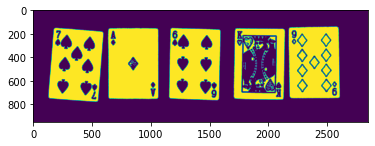

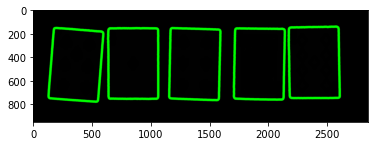

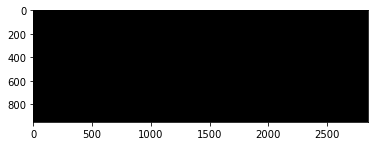

95
95


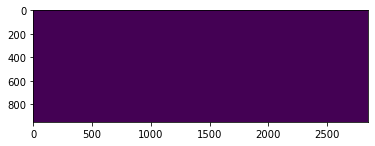

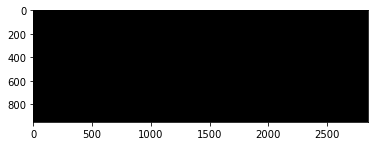

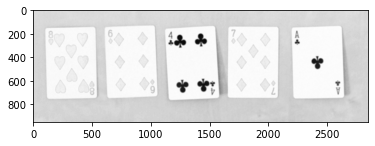

220
249


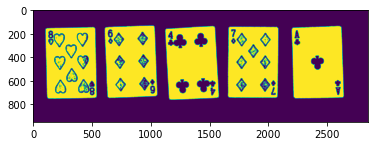

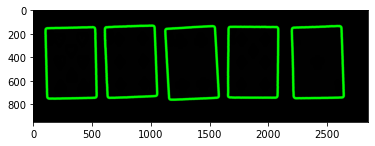

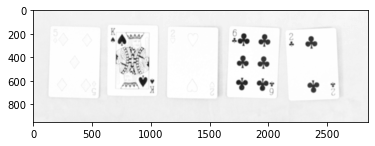

240
254


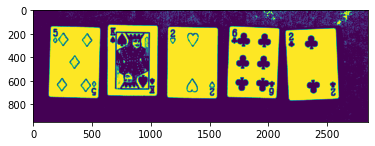

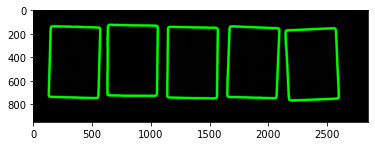

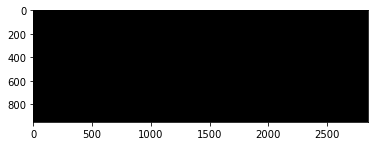

89
89


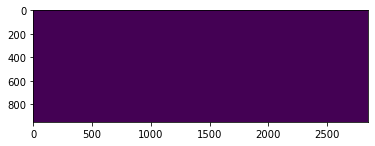

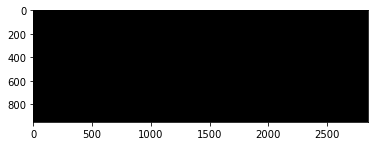

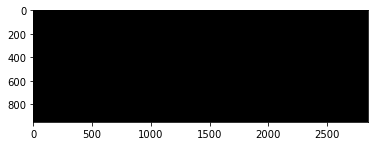

101
101


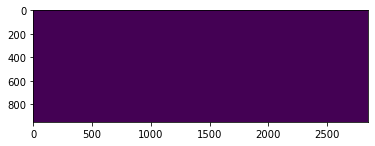

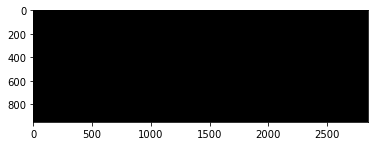

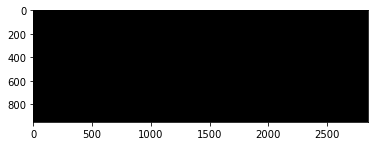

188
188


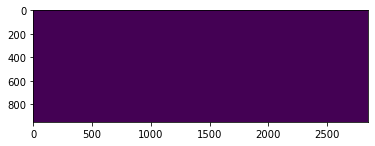

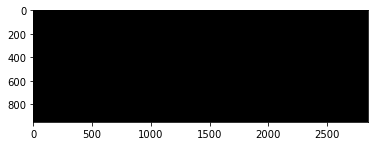

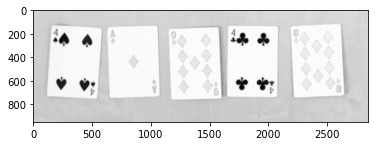

215
248


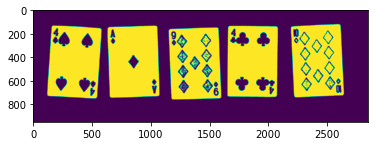

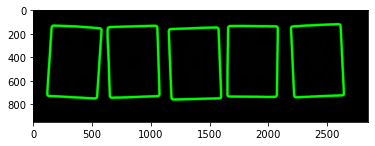

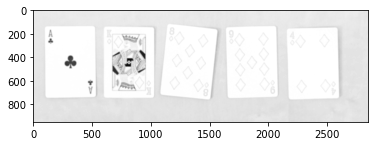

238
254


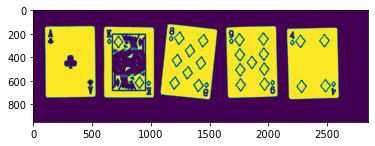

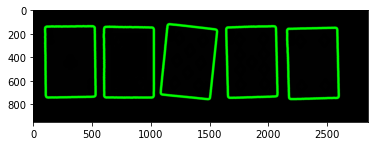

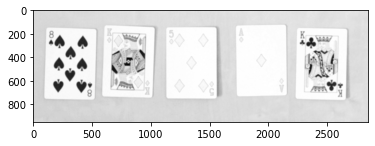

219
248


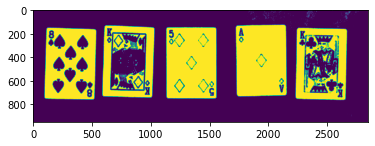

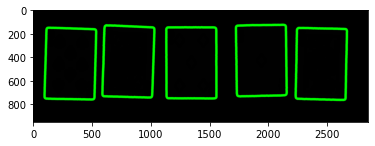

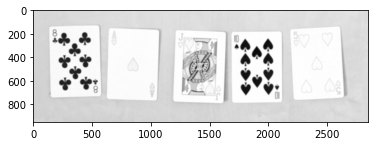

222
249


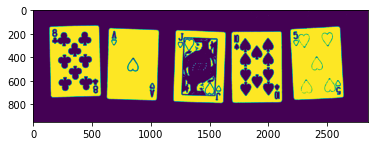

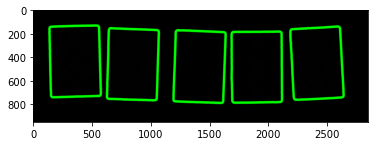

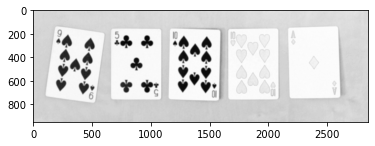

210
246


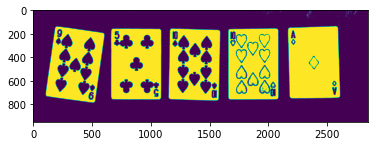

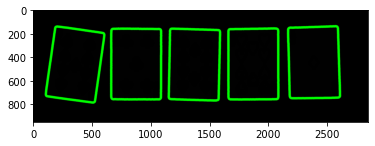

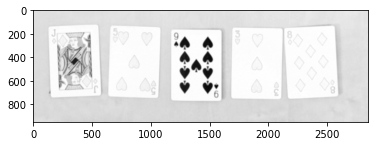

224
253


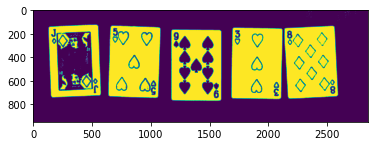

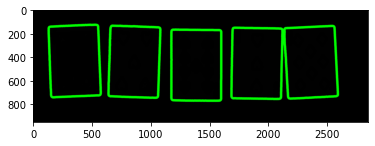

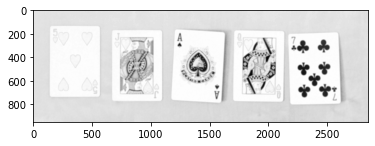

230
252


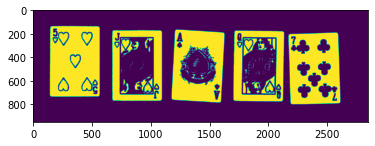

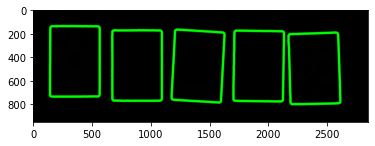

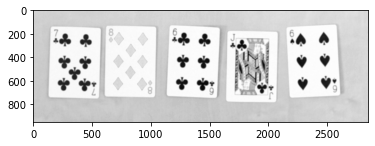

210
248


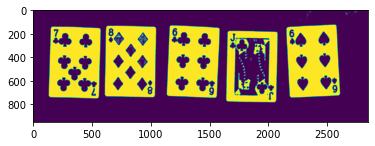

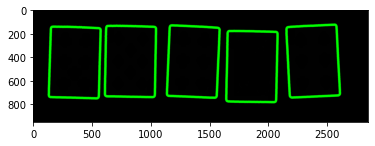

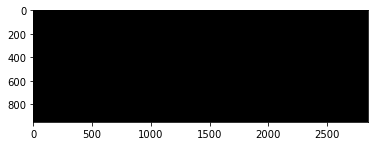

83
83


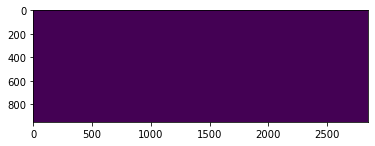

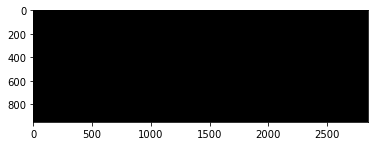

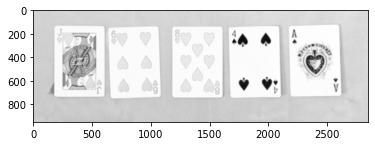

214
248


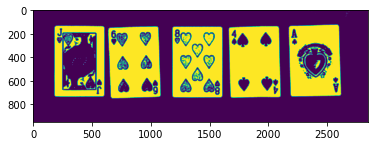

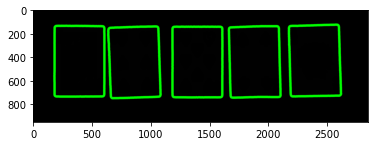

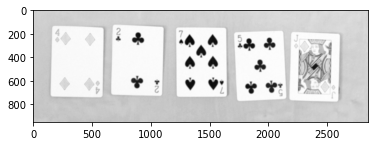

212
249


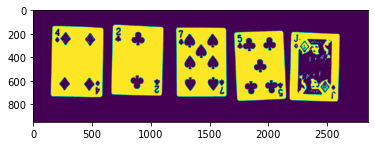

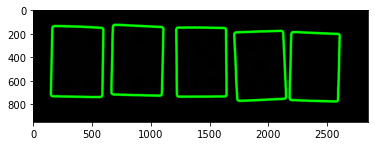

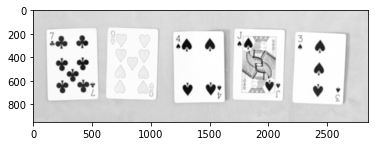

216
249


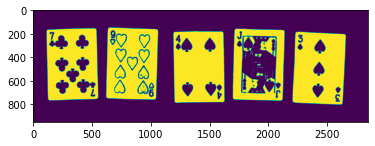

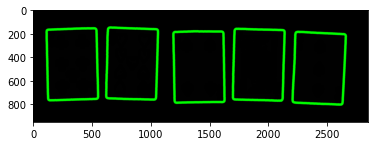

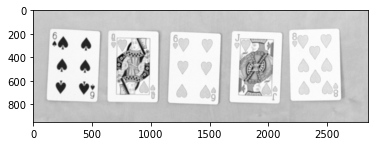

202
249


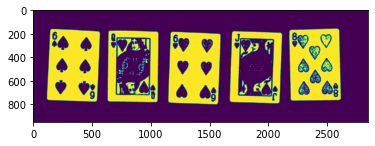

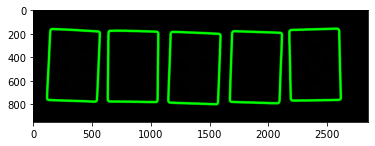

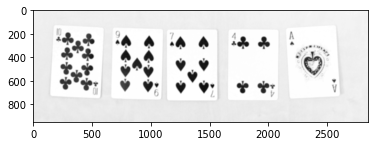

241
253


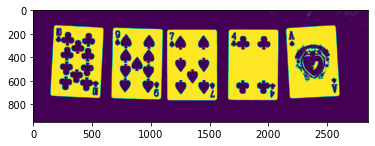

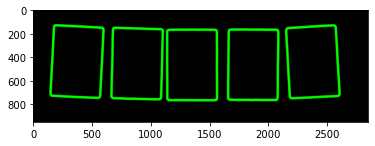

In [206]:
def extract_contours(img):
    #img = cv2.medianBlur(img,5)
    img = cv2.GaussianBlur(img,(11,11),100)
    sharpen_kernel = np.array([[0, -1, 0],
                              [-1, 5,-1],
                              [0, -1, 0]])
    # sharpen_kernel = np.array([[-1, -1, -1],
    #                           [-1, 9,-1],
    #                           [-1, -1, -1]])
    img = cv2.filter2D(img,ddepth=-1,kernel = sharpen_kernel)
    img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)[:,:,2]
    plt.imshow(img_grey,cmap='gray')
    plt.show()
    color_background = img_grey[40,40]
    color_card = img_grey[550,200]
    print(img_grey[40,40])
    print(img_grey[550,200])
    separation_threshold = np.mean([color_background,color_card])
    # thresh = cv2.Canny(img_grey,0,70)
    #thresh = cv2.adaptiveThreshold(img_grey,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    #flag, thresh = cv2.threshold(img_grey, 0, 255, cv2.THRESH_OTSU)
    flag, thresh = cv2.threshold(img_grey, separation_threshold, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh)
    plt.show()
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    contours = sorted(contours, key=cv2.contourArea,reverse=True) [:5]
    tresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)*255
    img = cv2.drawContours(tresh_color.copy(), contours, -1,(0,255,0),20)
    plt.imshow(img)
    plt.show()

extract_contours(bottom_cards)

for partition in partitions:
    cards = partition['bottom_cards']
    extract_contours(cards)